# Fit (x,y) dataset [from my inverse theory class] using a Neural Network.
## Use MSE with a single neuron in the hidden layer - do the weight values corresond to slope and intercept?
## USE MAE - how does the slope of the line change?
## Use a custom loss function (high order norm) - how does the slope of the line change?
## What happens when you use a deep network?
### Mrinal K. Sen, JSG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xy=pd.read_csv('./xydata.dat')

In [3]:
xy.head(5)

,X,Y
0,1.0,4.0
1,1.5,5.0
2,2.0,3.8
3,2.1,3.9
4,2.9,5.0


In [4]:
xy['X']

0      1.00
1      1.50
2      2.00
3      2.10
4      2.90
5      3.00
6      3.50
7      3.55
8      4.00
9      4.10
10     5.00
11     6.00
12     6.10
13     6.20
14     6.30
15     7.00
16     8.00
17     8.10
18     8.20
19     8.50
20     9.00
21     9.50
22     9.70
23     9.80
24    10.00
Name: X, dtype: float64

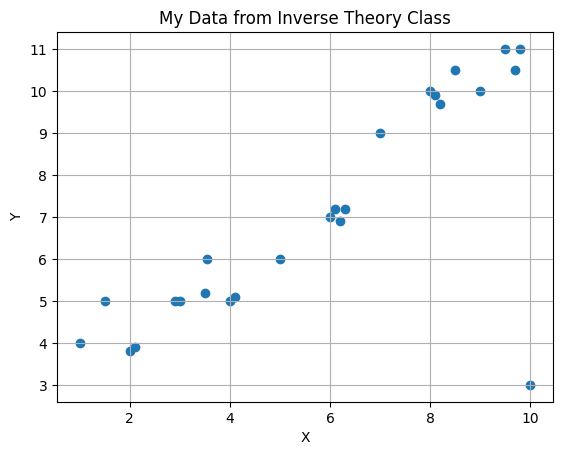

(25,)

In [5]:
plt.scatter(xy['X'],xy['Y'])
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('My Data from Inverse Theory Class')
plt.show()

x=xy['X'].values
y=xy['Y'].values
x=x/max(x)
y=y/max(y)
x.shape


# Tasks
* Develop a NN model for linear regression of this dataset

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)


import seaborn as sns

2.14.0


In [7]:
import keras.backend as kb

In [8]:
# define a custon loss function
def my_loss(actual,predicted, norm = 'L2'):
    if norm == 'L4':
        loss=kb.mean(kb.sum(kb.square(kb.square(actual-predicted)))) #L4
    elif norm == 'L2':
        loss=kb.mean(kb.sum(kb.square(actual-predicted))) # L2
    elif norm == 'L1':
        loss=kb.mean(kb.sum(kb.abs(actual-predicted)))  # L1
    else:
        raise NotImplementedError('The specified norm {} is not recognized'.format(norm))
    
    return loss


In [9]:
n1=1  # input dimension
l1=1  # number of neurons in hidden layer 1
l2=1  # output dimension (umber of neurons in the output layer)

def build_model():
  model = keras.Sequential([
    layers.Dense(l1,  input_dim=n1), #activation='relu',
    #layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=1),
    # layers.Dropout(0.1),
    #layers.Dense(10, activation='relu'),
    #layers.Dense(10, activation='relu'),
    layers.Dense(l2)

  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)
  #optimizer = tf.keras.optimizers.SGD()

  model.compile(loss=my_loss, #'mae',  #mse
                optimizer='adam',#optimizer,
                metrics=['mae', 'mse'])
  return model

model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#model.metrics
history = model.fit(x,y,epochs=500,batch_size=2)

Epoch 1/500
13/13 [==============================] - 1s 1ms/step - loss: 0.5751 - mae: 0.5028 - mse: 0.2895
Epoch 2/500
13/13 [==============================] - 0s 962us/step - loss: 0.4800 - mae: 0.4632 - mse: 0.2479
Epoch 3/500
13/13 [==============================] - 0s 927us/step - loss: 0.4159 - mae: 0.4243 - mse: 0.2108
Epoch 4/500
13/13 [==============================] - 0s 956us/step - loss: 0.3577 - mae: 0.3912 - mse: 0.1792
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2938 - mae: 0.3554 - mse: 0.1489
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2520 - mae: 0.3244 - mse: 0.1267
Epoch 7/500
13/13 [==============================] - 0s 953us/step - loss: 0.1991 - mae: 0.2926 - mse: 0.1044
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1685 - mae: 0.2637 - mse: 0.0872
Epoch 9/500
13/13 [==============================] - 0s 960us/step - loss: 0.1457 - mae: 0.2365 - mse: 0.0730
Epoch 10/500
13/13

In [11]:
print(model.layers)
model.layers[0].get_weights()

[<keras.src.layers.core.dense.Dense object at 0x0000018E3EE44390>, <keras.src.layers.core.dense.Dense object at 0x0000018E42B0B650>]


[array([[-0.37731183]], dtype=float32), array([-0.10271329], dtype=float32)]

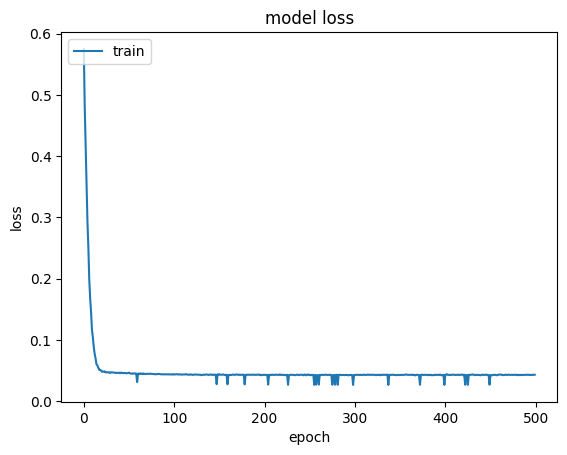

In [12]:
# list all data in history

# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_predict=model.predict(x)

1/1 [==============================] - 0s 62ms/step


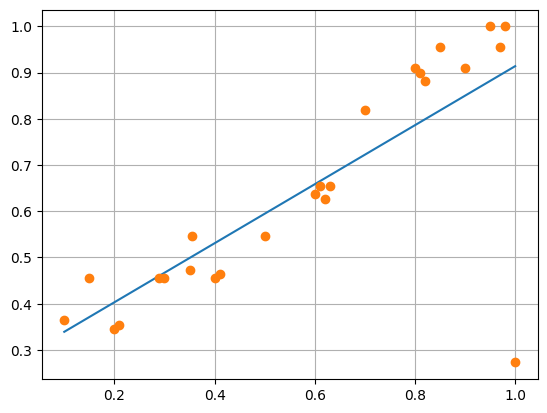

In [14]:
plt.plot(x,y_predict)
plt.plot(x,y,'o')
plt.grid()